In [46]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *
from scipy.stats import *
from sklearn.metrics import mean_squared_error as msq
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

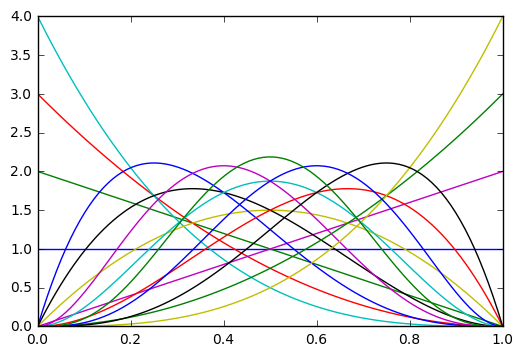

In [102]:
# Строим априорные распределения(бета) для разных параметров
x = linspace(0,1,100)
for x1 in range(1, 5):
    for x2 in range(1, 5):
        plt.plot(x, beta.pdf(x,a=x1,b=x2))
plt.show()

 Там, где смещено справо, монетка нечестная и имеет смещение в сторону орла, и наоборот для решки.
 При x1 = x2 априорная плоность симметрична относительно 0.5, значит монетка скорее честная

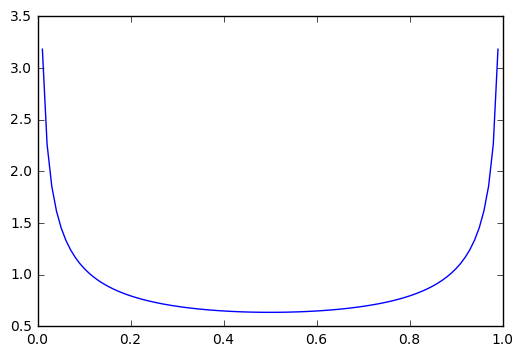

In [99]:
plt.plot(x, beta.pdf(x,a=0.5,b=0.5))
plt.show()

Тут вообще 0.5 наименее вероятно

In [78]:
# Байесовская оценка (сопряженное распределение - бета)
def bayes(sample, x1, x2):
    return (x1 + sum(sample) - 1.0) / (x1 + x2  + len(sample))

In [72]:
arr1 = [[], [], []]
arr1[0] += [1]
arr1[0] += [1]

arr1[2]

[]

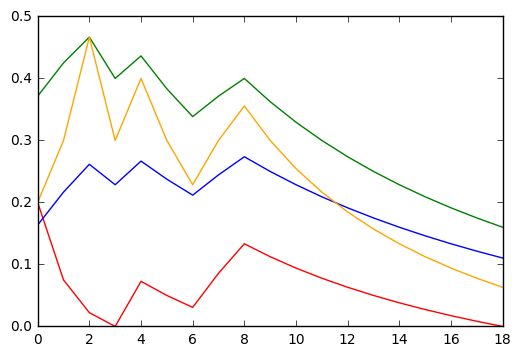

In [118]:
# Для монетки с p = 0.2
arr1 = [[], [], [], []]
sample = binom.rvs(n=1, p=0.2, size=20)
params = [[1, 5], [5, 1], [5, 5]]
for i in range(4):
    for n in range(1, 20):
        if i == 3:
            arr1[i] += [abs(0.2 - sample[:n].mean())]
        else :
            arr1[i] += [abs(0.2 - bayes(sample[:n], params[i][0], params[i][1]))]
        
color = ['r', 'g', 'b', 'orange']        
for i in range(4):
    plt.plot(range(19), arr1[i], color=color[i])
plt.show()

### Вывод
Из опробованных лучше всего байесовская оценка с параметрами 1, 5

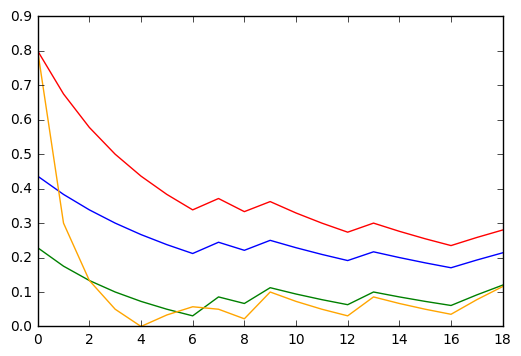

In [119]:
# Для монетки с p = 0.8
arr1 = [[], [], [], []]
sample = binom.rvs(n=1, p=0.8, size=20)
params = [[1, 5], [5, 1], [5, 5]]
for i in range(4):
    for n in range(1, 20):
        if i == 3:
            arr1[i] += [abs(0.8 - sample[:n].mean())]
        else :
            arr1[i] += [abs(0.8 - bayes(sample[:n], params[i][0], params[i][1]))]
        
color = ['r', 'g', 'b', 'orange']        
for i in range(4):
    plt.plot(range(19), arr1[i], color=color[i])
plt.show()

### Вывод
Из опробованных лучше всего байесовская оценка с параметрами 5, 1 и оценка максимального правдоподобия

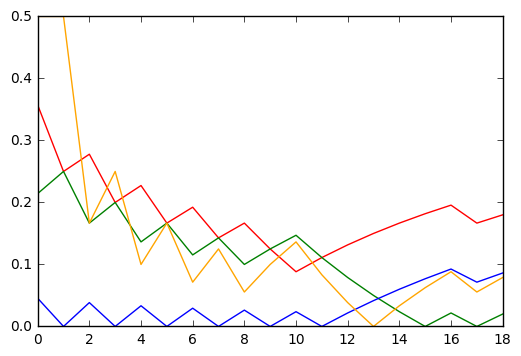

In [124]:
# Для монетки с p = 0.5
arr1 = [[], [], [], []]
sample = binom.rvs(n=1, p=0.5, size=20)
params = [[1, 5], [5, 1], [5, 5]]
for i in range(4):
    for n in range(1, 20):
        if i == 3:
            arr1[i] += [abs(0.5 - sample[:n].mean())]
        else :
            arr1[i] += [abs(0.5 - bayes(sample[:n], params[i][0], params[i][1]))]
        
color = ['r', 'g', 'b', 'orange']        
for i in range(4):
    plt.plot(range(19), arr1[i], color=color[i])
plt.show()

### Вывод
Из опробованных лучше всего байесовская оценка с параметрами 5, 5